<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Supervised Learning Model Comparison

_author The arbitrary and capricious heart of data science_

---

### Let us begin...

Recall the "data science process."
   1. Define the problem.
   2. Gather the data.
   3. Explore the data.
   4. Model the data.
   5. Evaluate the model.
   6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Process
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics

# Models
## Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

## Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
# Read data
df = pd.read_csv('./401ksubs.csv')

In [3]:
# Check data shape
print(df.shape)
df.head()

(9275, 11)


,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In [4]:
# 1 - Career: Different careers might have different income.
# 2 - City: High cost locations are likly to have high income people
# 3 - Education: Higher educational level people might have higher oppotunity to find a good job.

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

In [5]:
# This is a very sensitive issue that leads to discrimination whether or not race affects a model.

## Step 3: Explore the data.



In [6]:
# EDA
## Check data types
df.dtypes

e401k       int64
inc       float64
marr        int64
male        int64
age         int64
fsize       int64
nettfa    float64
p401k       int64
pira        int64
incsq     float64
agesq       int64
dtype: object

In [7]:
# Identify missing values
df.isnull().sum()

e401k     0
inc       0
marr      0
male      0
age       0
fsize     0
nettfa    0
p401k     0
pira      0
incsq     0
agesq     0
dtype: int64

In [8]:
# Check duplicate data
df[df.duplicated(keep=False)]

## 2 data are likly to be duplicated, we will drop 1 of these data.

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
8172,0,13.44,0,0,42,4,0.0,0,0,180.6336,1764
8304,0,13.44,0,0,42,4,0.0,0,0,180.6336,1764


In [9]:
# Drop duplicated data
df.drop_duplicates(inplace=True)
df.shape

(9274, 11)

In [10]:
# Identify obvious outliers
df.describe()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.00000
mean,0.392172,39.257425,0.628639,0.204443,41.080116,2.884947,19.073732,0.276256,0.254367,2121.401731,1793.65592
std,0.488261,24.089809,0.483195,0.403315,10.300068,1.525874,63.966980,0.447169,0.435528,3001.563604,895.69708
min,0.000000,10.008000,0.000000,0.000000,25.000000,1.000000,-502.302000,0.000000,0.000000,100.160100,625.00000
25%,0.000000,21.663000,0.000000,0.000000,33.000000,2.000000,-0.500000,0.000000,0.000000,469.285600,1089.00000
50%,0.000000,33.288000,1.000000,0.000000,40.000000,3.000000,2.000000,0.000000,0.000000,1108.091000,1600.00000
75%,1.000000,50.161500,1.000000,0.000000,48.000000,4.000000,18.449750,1.000000,1.000000,2516.175750,2304.00000
max,1.000000,199.041000,1.000000,1.000000,64.000000,13.000000,1536.798000,1.000000,1.000000,39617.320000,4096.00000


In [11]:
 def bulk_scatters(features, target, data):
    """Bulk scatter plots all of features against target"""
    rows = math.ceil(len(features) / 4)
    fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))
    for i, feat in enumerate(features): ## iterate column name
        x = i // 4
        y = i % 4
        pl = sns.scatterplot(
            ax=axes[x,y],
            x=feat,
            y=target,
            data=data)
        if y != 0:
            pl.set(ylabel=None, yticklabels=[])  ## show label only the leftmost plot 

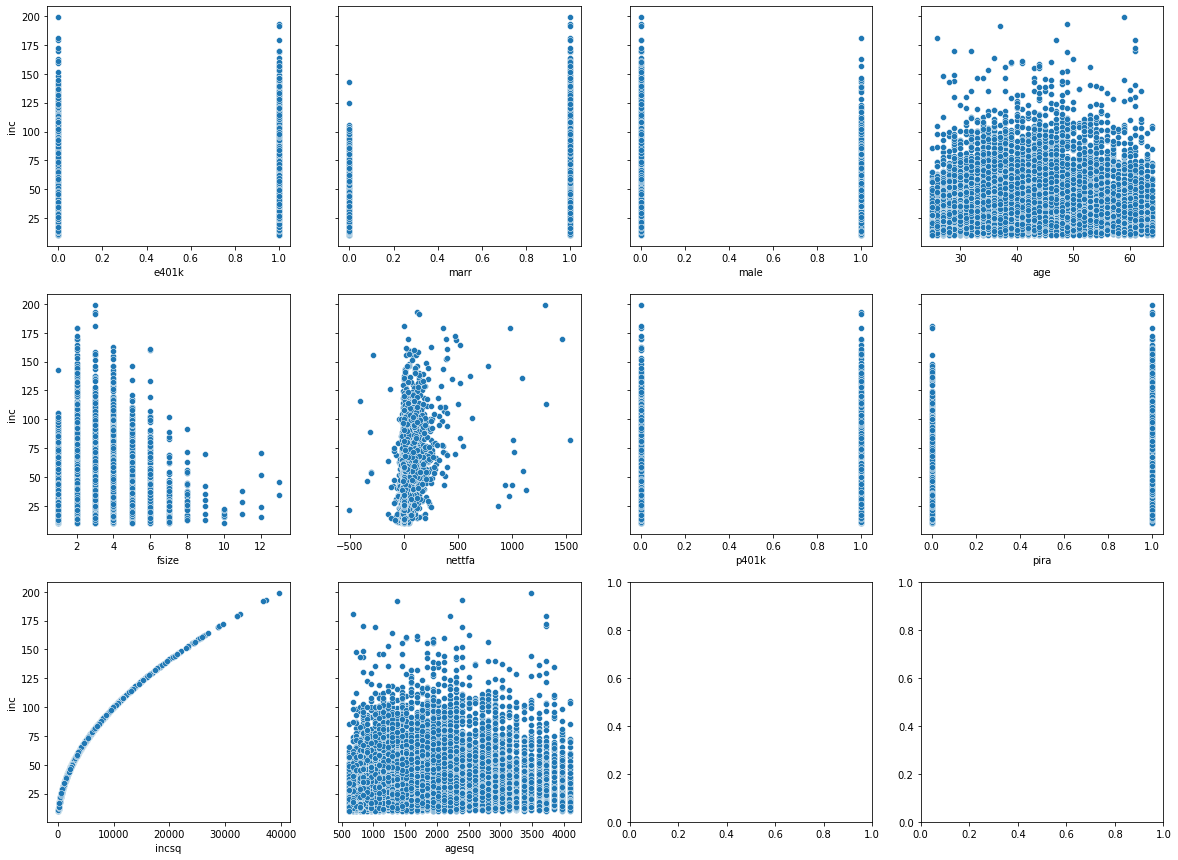

In [12]:
# Bulk scatter plots all features vs. income
bulk_scatters(df.drop(columns='inc').columns, 'inc', df)

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

In [13]:
# Income squared beacause it was made from income. 
## So in reality we do not know what y value (income) would be 
## and we can not create income squared

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

In [14]:
# Two variables that were created for use are
# 1 - agesq
# 2 - incsq
## SMEs might have thought that older people have higher experience that strongly affects to their income. 

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [15]:
# The errors are in age and inc variabls that described as their squared.
# And also inc variable would not be in USD unit but 1,000 USD unit.

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

In [16]:
# 1. Linear regression - Linear regression might be useful 
#                        if we want to under stand a relationship of X and y

# 2. kNN regression - kNN might not be appropriate because the other model might have higher perfromance.
#                     But it's useful when it comes to baseline score to compare model performance.

# 3. Decision tree regressor - Decision tree might not be appropriate becuase of its variance.
#                              Decision tree is likely to be overfit model.

# 4. Bagging - Bagging is one of methods that make decision tree reduce a variance.
#              It would be appropriate for the problem.

# 5. Random forest - Random forest would be appropriate choice because it could reduce decision tree's variance.

# 6. Adaboost model - Adaboost would be a good choice if we face high bias problem. 
#                     If given features can not provide good signals, we would boost model performace by this method.

# 7. Gradientboost model - This method is also able boost model performance as Adaboost.

# 8. Stacking - Stacking can also be useful because we can integrate models together and make a final model more powerful.

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [17]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [18]:
# Compare correlation between income and income square vs. all features
## income
df.drop(columns=['incsq', 'e401k', 'p401k', 'pira']).corr()['inc'].sort_values(ascending=False)

inc       1.000000
nettfa    0.376576
marr      0.361913
fsize     0.110265
age       0.105655
agesq     0.087307
male     -0.069935
Name: inc, dtype: float64

In [19]:
# Compare correlation between income and income squared vs. all features
## income squared
df.drop(columns=['inc', 'e401k', 'p401k', 'pira']).corr()['incsq'].sort_values(ascending=False)

## Income squared tends to have higher correlation with all features.
## We can set this variable to be our model target instead of normal income.

incsq     1.000000
nettfa    0.407558
marr      0.280001
age       0.097592
agesq     0.082991
fsize     0.079625
male     -0.053752
Name: incsq, dtype: float64

In [20]:
# Define X and y
X = df.drop(columns=['e401k', 'inc', 'p401k', 'incsq', 'pira'])
y = df['inc']

# Split train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
# Check split size
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6955, 6), (2319, 6), (6955,), (2319,))

##### 8.1 Modelling

In [22]:
# - a multiple linear regression model
# - a k-nearest neighbors model
# - a decision tree
# - a set of bagged decision trees
# - a random forest
# - an Adaboost model

In [23]:
# Create list of fit model
models = []

In [24]:
# Multiple linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Append model to list
models.append(reg)

In [25]:
print('Train score:', reg.score(X_train, y_train).round(2))
print('Test score', reg.score(X_test, y_test).round(2))

Train score: 0.29
Test score 0.29


In [26]:
# kNN
pipe_knn = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipe_knn_params = {
    'knn__n_neighbors': [3, 5, 10]
}

# Instantiate
pipe_knn_gs = GridSearchCV(pipe_knn, pipe_knn_params, cv=5, verbose=1)

# Fit
pipe_knn_gs.fit(X_train, y_train)

# Append model to list
models.append(pipe_knn_gs)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [27]:
# DecisionTreeRegressor()

    # criterion='squared_error',
    # splitter='best',
    # max_depth=None,
    # min_samples_split=2,
    # min_samples_leaf=1,
    # min_weight_fraction_leaf=0.0,
    # max_features=None,
    # random_state=None,
    # max_leaf_nodes=None,
    # min_impurity_decrease=0.0,
    # ccp_alpha=0.0,

In [28]:
# Decision tree

dtr_params = {
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': range(1, 6)
}

dtr_gs = GridSearchCV(DecisionTreeRegressor(), dtr_params, cv=5, verbose=1)

dtr_gs.fit(X_train, y_train)

# Append model to list
models.append(dtr_gs)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [29]:
# Bagged decision tree
bag = BaggingRegressor(random_state=42)

bag.fit(X_train, y_train)

# Append model to list
models.append(bag)

In [30]:
# Random forest

rfr_params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 3, 5]
}

rfr_gs = GridSearchCV(RandomForestRegressor(), rfr_params, cv=5, verbose=1)

rfr_gs.fit(X_train, y_train)

# Append model to list
models.append(rfr_gs)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [31]:
# Adaboost
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

ada_params = {
    'base_estimator__max_depth': [1,2,3,4,5]
}

ada_gs = GridSearchCV(ada, ada_params, cv=5, verbose=1)

ada_gs.fit(X_train, y_train)

# Append model to list
models.append(ada_gs)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


##### 9. What is bootstrapping?

In [32]:
# Bootstrapping is method to reduce model's bias by resampling n time with replacement
# and using these sets of sample to train models.
# Bootstrapping aslo make our model to be more reaslistic or closer with population function.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

In [33]:
# A decision tree is a single tree that fited from all sample
# while a set of bagged decision trees are multiple deecision trees that fit from bootstrapping sample.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

In [34]:
# Concept of a random forest is quite similar to bagging in terms of sampling data with replacement.
# But only sampling data with replaceant for many decision trees could leads to multicollinearity in each tree.
# So, a random forest fixed this problem by resampling features that used in each model. 

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

In [35]:
# A random forest can reduce overfitting problem or reduce variance of bagged decision tress by resampling
# features of each model.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [36]:
# Create RMSE calculation model
def cal_rmse(fit_model, X_test, y_test):
    y_preds = fit_model.predict(X_test)
    return metrics.mean_squared_error(y_test, y_preds, squared=False)

In [37]:
# Check model list
models

[LinearRegression(),
 GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('sc', StandardScaler()),
                                        ('knn', KNeighborsRegressor())]),
              param_grid={'knn__n_neighbors': [3, 5, 10]}, verbose=1),
 GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
              param_grid={'min_samples_leaf': range(1, 6),
                          'min_samples_split': [2, 3, 4, 5]},
              verbose=1),
 BaggingRegressor(random_state=42),
 GridSearchCV(cv=5, estimator=RandomForestRegressor(),
              param_grid={'max_depth': [5, 10, 15],
                          'min_samples_leaf': [1, 3, 5]},
              verbose=1),
 GridSearchCV(cv=5,
              estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
              param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5]},
              verbose=1)]

In [38]:
models_df = pd.DataFrame(index=['linear', 'knn', 'decision_tree', 'bagging', 'random_forest', 'adaboost'])

In [39]:
# Calculate RMSE each model

# Create dataframe for models
models_df = pd.DataFrame(index=['linear', 'knn', 'decision_tree', 'bagging', 'random_forest', 'adaboost'],
                        columns=['r_train', 'r_test', 'rmse_train', 'rmse_test'])

for i in range(len(models)):
    models_df['r_train'].iloc[i] = models[i].score(X_train, y_train).round(2)
    models_df['r_test'].iloc[i] = models[i].score(X_test, y_test).round(2)
    models_df['rmse_train'].iloc[i] = cal_rmse(models[i], X_train, y_train).round(2)
    models_df['rmse_test'].iloc[i] = cal_rmse(models[i], X_test, y_test).round(2)

In [40]:
models_df

,r_train,r_test,rmse_train,rmse_test
linear,0.29,0.29,20.31,20.32
knn,0.46,0.35,17.76,19.41
decision_tree,0.63,0.22,14.71,21.35
bagging,0.87,0.27,8.72,20.59
random_forest,0.43,0.39,18.13,18.78
adaboost,0.2,0.19,21.5,21.66


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

In [41]:
# Based on RMSE for training and testing, there is on model that extremely overfitting
# which is set of begged decision trees.
# Training and testing RMSE for the model are 8.72 and 20.59 respectively.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [42]:
# I would picck a random forest model because it has most predictive performance, 
# which are R squared and RMSE.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [43]:
# 1 - Tune hyperparameters more.
# 2 - Clean data more.
# 3 - Find more useful features by feature engineering process.

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [44]:
# Check correlation between 'e401k' and 'p401k'
df.groupby('p401k')['e401k'].mean()

p401k
0    0.160161
1    1.000000
Name: e401k, dtype: float64

In [45]:
# As table above, person who participated in 401k ('p401k' == 1)
# will 100% be eligible for 401k that is informaion leakage for the model.

# In reality, it does not make sense predicting eligibility of something by
# participation of itself.


##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

In [46]:
# Logistic regression: this model could be useful when we want to understand relationship
#                      between featrues and class variable but might have underfitting problem.

# kNN: this model is fast to run because of its architecture but it might be lower performance
#      compare with other complex models. And it also have less hyperparameters to tune which means
#      we can not adjust much after doing feature selection process.
#      However, if the model performance is good enough it would be appropriate to use because 
#      it's fast in terms of computaion.

# Decision tree: decision would be easy to understand in terms of concept and a little bit explainable
#                for relationship of features and class but a dcision tree is likly to have
#                overfitting problem.
#                However, we can use some technic such as bagging to reduce its variance.

# Random forest: random forest classifier would be appropriate choich compare with decision tree
#                because it's trying to reduce variance of decistion tree and decorrelating trees 
#                in bagging technic.

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [47]:
# EDA
## Create function for barchart plotting
def barplot_chart(data, features, target):
    """Create countplot from iterating all given features cut by target label
    data = pd.DataFrame
    x = given features
    hue = a target variable"""
    # create subplots by number of x
    rows = math.ceil(len(features) / 4)
    fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))
    
    # iterate column name
    for i, feat in enumerate(features): 
        x = i // 4
        y = i % 4
        if len(features) <= 4:
            axs = axes[y]
        else:
            axs = axes[x, y]
        pl = sns.barplot(
            ax = axs,
            x = target,
            y = feat,
            data = data
        )

In [48]:
# Select feature
features_class = df.columns.to_list()

# Drop unused features
features_class = [feat for feat in features_class if feat not in ['e401k', 'p401k']]

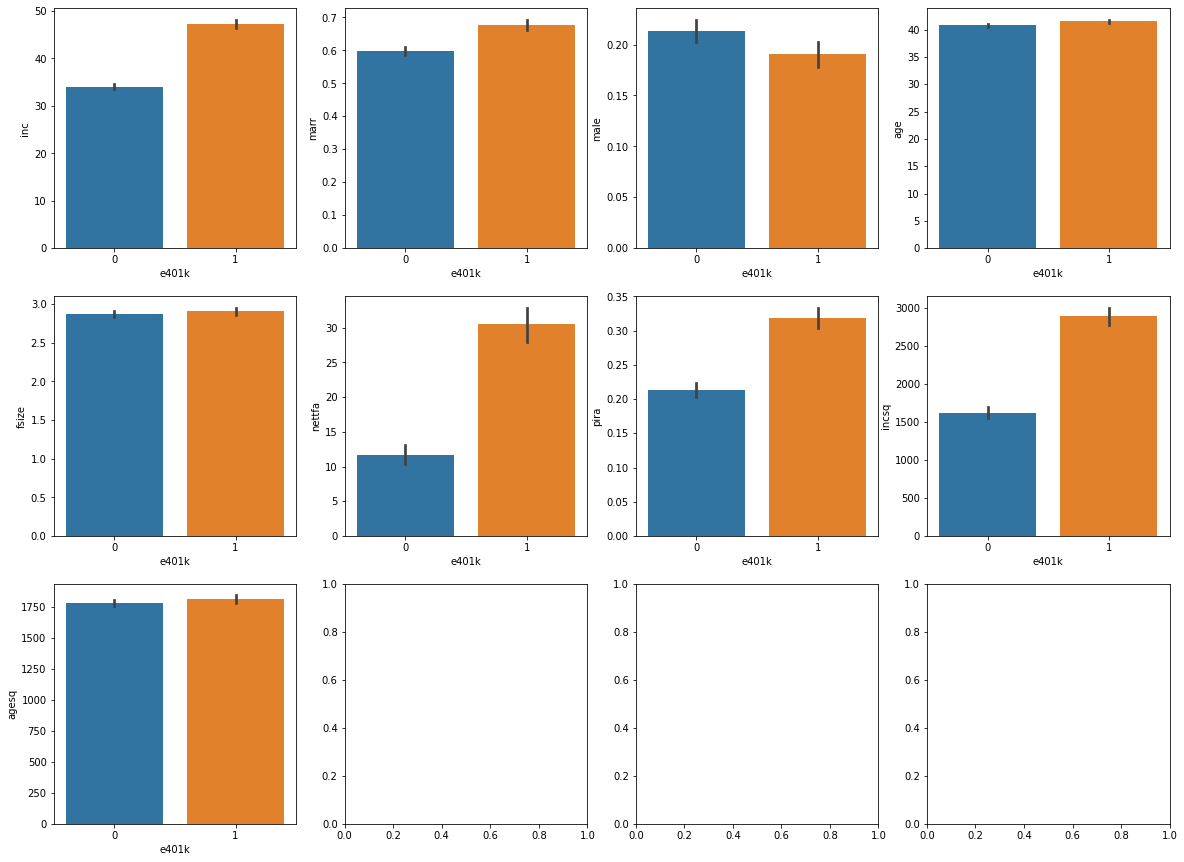

In [49]:
# Plot all features vs. 'e401k'
barplot_chart(df, features_class, 'e401k')

## From charts below, inc, nettfa, pira, incsq give huge difference between each class.
## marr and male give slight difference between each class.


In [51]:
df

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809
...,...,...,...,...,...,...,...,...,...,...,...
9270,0,58.428,1,0,33,4,-1.200,0,0,3413.8310,1089
9271,0,24.546,0,1,37,3,2.000,0,0,602.5061,1369
9272,0,38.550,1,0,33,3,-13.600,0,1,1486.1020,1089
9273,0,34.410,1,0,57,3,3.550,0,0,1184.0480,3249


In [55]:
# Feature selection
## Now we select final features from above suggestion
features_class = ['inc', 'nettfa', 'pira', 'incsq', 'marr', 'male']

# Set X, y
X = df[features_class]
y = df['e401k']

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [56]:
# Check train and test size
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6955, 6), (2319, 6), (6955,), (2319,))

In [58]:
# Check class balance
print(y_train.value_counts(normalize=True).mul(100).round(2))
print(y_test.value_counts(normalize=True).mul(100).round(2))

0    60.78
1    39.22
Name: e401k, dtype: float64
0    60.8
1    39.2
Name: e401k, dtype: float64


In [ ]:
# Models
# - a logistic regression model
# - a k-nearest neighbors model
# - a decision tree
# - a set of bagged decision trees
# - a random forest
# - an Adaboost model

In [61]:
# Create dataframe to store models and performance
models_class_df = pd.DataFrame(columns=['model'], 
                               index=['logistic', 'knn', 'decision_tree'
                                      , 'bagging', 'random_forest', 'adaboost'])

In [64]:
# Modelling
## Logistic regression
logreg = LogisticRegression(penalty='none', random_state=42)

logreg.fit(X_train, y_train)

# Add model to dataframe
models_class_df['model'].iloc[0] = logreg

In [67]:
# Modelling
## kNN
pipe_knn = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipe_knn.fit(X_train, y_train)

# Add model to dataframe
models_class_df['model'].iloc[1] = pipe_knn

In [70]:
# Modelling
## decision tree
dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)

# Add model to dataframe
models_class_df['model'].iloc[2] = dtc

In [78]:
# Modelling
## Bagged decision trees
bag = BaggingClassifier(random_state=42)

bag.fit(X_train, y_train)

# Add model to dataframe
models_class_df['model'].iloc[3] = bag

In [80]:
# Modelling
## Random forest
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

# Add model to dataframe
models_class_df['model'].iloc[4] = rfc

In [82]:
# Modelling
## Adaboost
ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train, y_train)

# Add model to dataframe
models_class_df['model'].iloc[5] = ada

In [83]:
models_class_df

,model
logistic,"LogisticRegression(penalty='none', random_stat..."
knn,"(StandardScaler(), KNeighborsClassifier())"
decision_tree,DecisionTreeClassifier(random_state=42)
bagging,(DecisionTreeClassifier(random_state=195292617...
random_forest,"(DecisionTreeClassifier(max_features='sqrt', r..."
adaboost,"(DecisionTreeClassifier(max_depth=1, random_st..."


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

In [91]:
# False positives is that when a model incorrectly predicted someone is eligible for 401k

# False negatives is that when a model incorrectly predicted someone is not eligible for 401k

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

In [ ]:
# In this case, minimize false positives would be better because
# we want to predict potential customers for 401k. 
# So, if we spend money on incorrectly predicted potential customers,
# it means we waste the company money without any return.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

In [ ]:
# Precision would be optimized for this case. If our model has good precision,
# it means we can precisely identify our potential customers 
# and spend money on the right persons.


##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.